### CONFIGURATION

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import copy
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Hartwig imports
sys.path.append("/Users/peterpriestley/hmf/repos/scripts/analysisscripts") 
import analyseVCF as aVCF
import venn as vn

In [3]:
import os
VCF_PATH = "/Users/peterpriestley/hmf/analyses/cancerSample/"
VCF_SAMPLES=[]
#VCF_SAMPLES = ["CPCT02010269","CPCT02010299"]
#Find all VCF FILES in VCF directory
for x in os.listdir(VCF_PATH):
    if x[-3:] == "vcf":
        VCF_SAMPLES.append(x[:12])
print VCF_SAMPLES

['CPCT02010267', 'CPCT02010269', 'CPCT02010272', 'CPCT02010299', 'CPCT02010306', 'CPCT02010307', 'CPCT02010313', 'CPCT02010326', 'CPCT02010327', 'CPCT02020217', 'CPCT02020234', 'CPCT02020257']


<h3> LOAD VCF

In [4]:
#Load all VCF_SAMPLES to DF
df = pd.DataFrame({})
for VCF_SAMPLE in VCF_SAMPLES:
    VCF_FILE_NAME = VCF_SAMPLE + "R_"+ VCF_SAMPLE + "T_merged_somatics.vcf"
    SAMPLE_NAMES = {VCF_SAMPLE + 'T.mutect':'mutect', \
                    VCF_SAMPLE + 'T.freebayes':'freebayes', \
                   'TUMOR.strelka':'strelka', \
                   'TUMOR.varscan':'varscan'}
    df = pd.concat([df,aVCF.loadVaraintsFromVCF(VCF_PATH,VCF_FILE_NAME,SAMPLE_NAMES,VCF_SAMPLE)])

reading vcf file: CPCT02010267R_CPCT02010267T_merged_somatics.vcf
Number variants loaded: 4574
reading vcf file: CPCT02010269R_CPCT02010269T_merged_somatics.vcf
Number variants loaded: 4605
reading vcf file: CPCT02010272R_CPCT02010272T_merged_somatics.vcf
Number variants loaded: 4714
reading vcf file: CPCT02010299R_CPCT02010299T_merged_somatics.vcf
Number variants loaded: 4890
reading vcf file: CPCT02010306R_CPCT02010306T_merged_somatics.vcf
Number variants loaded: 4789
reading vcf file: CPCT02010307R_CPCT02010307T_merged_somatics.vcf
Number variants loaded: 4856
reading vcf file: CPCT02010313R_CPCT02010313T_merged_somatics.vcf
Number variants loaded: 4598
reading vcf file: CPCT02010326R_CPCT02010326T_merged_somatics.vcf
Number variants loaded: 4820
reading vcf file: CPCT02010327R_CPCT02010327T_merged_somatics.vcf
Number variants loaded: 4829
reading vcf file: CPCT02020217R_CPCT02020217T_merged_somatics.vcf
Number variants loaded: 4738
reading vcf file: CPCT02020234R_CPCT02020234T_merg

<h3> CHECKS

In [46]:
df[(df.variantType == "INDEL") & (df.variantSubType != "INSERT") & (df.variantSubType != "DELETE")]

,chrom,pos,chromPos,chromFrac,ref,vennSegment,numCallers,variantType,variantSubType,strelkaallele,strelkaallelicFreq,varscanallele,varscanallelicFreq,mutectallele,mutectallelicFreq,freebayesallele,freebayesallelicFreq,patientName
440,1,9530118,19530118,1.038235,AGG,freebayes,1,INDEL,,,,,,,,AG,0.964286,CPCT02010269
253,1,2789487,12789487,1.011191,TTCT,freebayes,1,INDEL,,,,,,,,TTCTTT,0.846154,CPCT02010272
4800,2,37574287,237574287,2.154500,TTATATATATATATATATATAA,freebayes,1,INDEL,,,,,,,,TTATATATATATATATATATATA,0.969697,CPCT02010307
912,1,45952454,145952454,1.184362,TACACACACACACACACACACACACACACACACACACA,freebayes,1,INDEL,,,,,,,,TACACACACACACACACACACACACACACACACACACACACACACA...,1,CPCT02010313
4321,2,64674201,264674201,2.265931,TCACACACACACACACACACACACACACACACACACAC,freebayes,1,INDEL,,,,,,,,TCACACACACACACACACACACACACACACACACACACACACACAC...,0.904762,CPCT02010313
3144,1,113980541,1113980541,1.457293,TCTCCTCC,freebayes,1,INDEL,,,,,,,,TCTCC,0.75,CPCT02020234
1592,1,116304059,1116304059,1.466615,GAA,freebayes,1,INDEL,,,,,,,,GAAGA,0.6875,CPCT02020257


In [ ]:
len(df)

<h3> High Level Stats

In [ ]:
pd.pivot_table(df, values='pos', index=['patientName'], columns=['variantType','numCallers'], aggfunc='count')

In [ ]:
df[['variantType','pos']].groupby(['variantType']).agg('count')

<h3> SNP Venn

In [5]:
snpdf = df[(df.variantType == 'SNP')]

In [6]:
snpdf[['numCallers','vennSegment','pos']].groupby(['numCallers','vennSegment']).agg('count')

pos
numCallers vennSegment                                    
1          freebayes                                 14879
           mutect                                    11862
           strelka                                   11963
           varscan                                    2153
2          filterInvarscan-freebayes                   197
           filterInvarscan-mutect                       67
           freebayes-mutect                             50
           strelka-filterInvarscan                      45
           strelka-freebayes                           108
           strelka-mutect                             2662
           strelka-varscan                             592
           varscan-freebayes                           128
           varscan-mutect                              152
3          filterInvarscan-freebayes-mutect              1
           strelka-filterInvarscan-freebayes             4
           strelka-filterInvarscan-mutect               16
           strelka-freebayes-mutect                     55
           strelka-varscan-freebayes                    87
           strelka-varscan-mutect                     5318
           varscan-freebayes-mutect                     11
4          Intersection                               1883
           strelka-filterInvarscan-freebayes-mutect      4

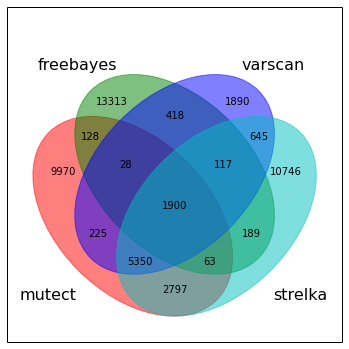

In [7]:
vn.venn([snpdf[snpdf.mutectallele != '']['chromPos'], \
         snpdf[snpdf.strelkaallele != '']['chromPos'], \
        snpdf[snpdf.freebayesallele != '']['chromPos'], \
        snpdf[snpdf.varscanallele != '']['chromPos'] \
        ],['mutect','strelka','freebayes','varscan'],figsize=(6,6))

### <hd1> Indel Venn

In [ ]:
indeldf= df[(df.variantType == 'INDEL')]

In [ ]:
indeldf[['numCallers','vennSegment','pos']].groupby(['numCallers','vennSegment']).agg('count')

In [ ]:
vn.venn([indeldf[indeldf.strelkaallele != '']['chromPos'], \
        indeldf[indeldf.freebayesallele != '']['chromPos'], \
        indeldf[indeldf.varscanallele != '']['chromPos'] \
        ],['strelka','freebayes','varscan'],figsize=(6,6))

<h3> Allelic Depth

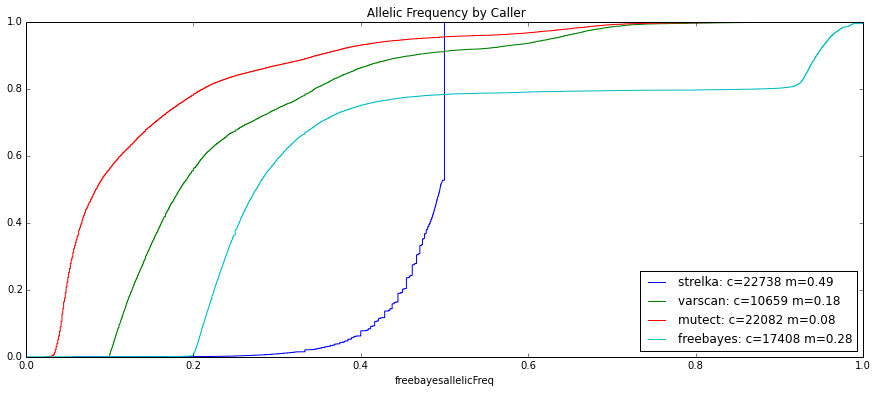

In [19]:
#Alllele Freq By Caller
for columnName in list(snpdf):
    if columnName.endswith('allele'):
        ser = snpdf[snpdf[columnName] != ''][columnName[:-6] + 'allelicFreq']
        ser = ser.sort_values()
        ser[len(ser)] = ser.iloc[-1]
        cum_dist = np.linspace(0.,1.,len(ser))
        ser_cdf = pd.Series(cum_dist, index=ser,name=columnName[:-6]+": c="+str(ser.count())+" m="+str(round(ser.median(),2)))
        ser_cdf.plot(drawstyle='steps',legend=True,title=" Allelic Frequency by Caller",figsize=[15,6])

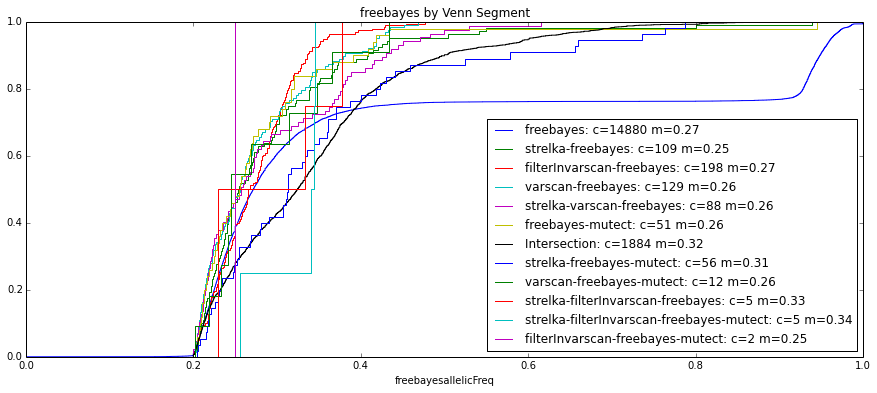

In [31]:
# BY CALLER BY VENN SEGMENT - Single Caller
myCaller = 'freebayes'
vennSegments = snpdf[snpdf[myCaller+'allele'] != ''].vennSegment.unique()
for vennSegment in vennSegments:
    ser = snpdf[(snpdf.vennSegment == vennSegment) & (snpdf[myCaller+'allele'] != '')][myCaller+'allelicFreq']
    ser = ser.sort_values()
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser,name=vennSegment+": c="+str(ser.count())+" m="+str(round(ser.median(),2)))
    ser_cdf.plot(drawstyle='steps',legend=True,title=myCaller+" by Venn Segment",figsize=[15,6])

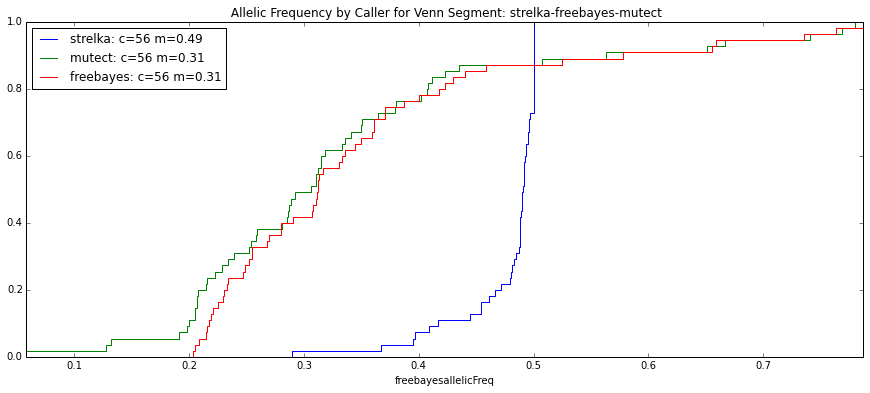

In [32]:
# BY CALLER BY VENN SEGMENT - Single Venn Segment
myVennSegment = 'strelka-freebayes-mutect'
for columnName in list(snpdf):
    if columnName.endswith('allele') and ((columnName[:-6] in myVennSegment) or (myVennSegment == 'Intersection')):
        ser = snpdf[(snpdf[columnName] != '') & (snpdf.vennSegment == myVennSegment)][columnName[:-6] + 'allelicFreq']
        ser = ser.sort_values()
        ser[len(ser)] = ser.iloc[-1]
        cum_dist = np.linspace(0.,1.,len(ser))
        ser_cdf = pd.Series(cum_dist, index=ser,name=columnName[:-6]+": c="+str(ser.count())+" m="+str(round(ser.median(),2)))
        ser_cdf.plot(drawstyle='steps',legend=True,title=" Allelic Frequency by Caller for Venn Segment: " \
                     +myVennSegment,figsize=[15,6])

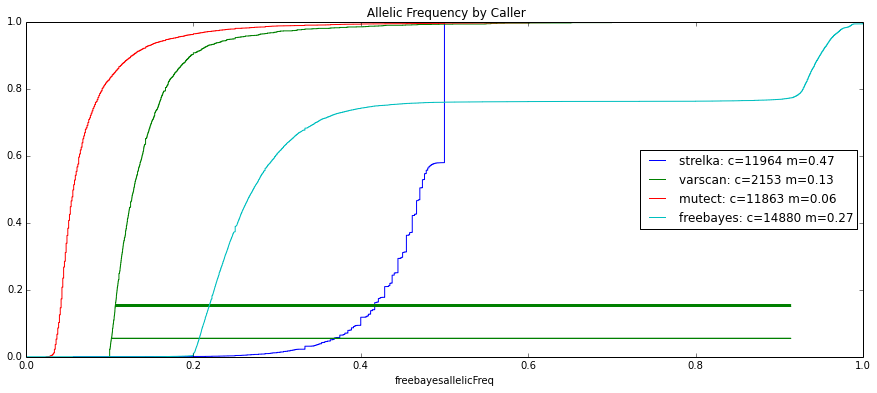

In [30]:
#Alllele Freq By Caller PRIVATE
for columnName in list(snpdf):
    if columnName.endswith('allele'):
        ser = snpdf[(snpdf[columnName] != '') & (snpdf.numCallers == 1)][columnName[:-6] + 'allelicFreq']
        ser = ser.sort_values()
        ser[len(ser)] = ser.iloc[-1]
        cum_dist = np.linspace(0.,1.,len(ser))
        ser_cdf = pd.Series(cum_dist, index=ser,name=columnName[:-6]+": c="+str(ser.count())+" m="+str(round(ser.median(),2)))
        ser_cdf.plot(drawstyle='steps',legend=True,title=" Allelic Frequency by Caller - Private Calls",figsize=[15,6])

### Allelic Depth Scatter Plot

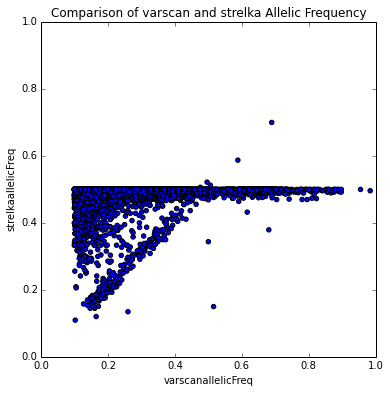

In [45]:
caller1 = 'varscan'
caller2 = 'strelka'
tempdf = df[(df[caller1+'allele']!='')&(df[caller2+'allele']!='')]
tempdf.head()
tempdf.plot.scatter(caller1+'allelicFreq',caller2+'allelicFreq' \
                        ,figsize=[6,6] \
                        ,title="Comparison of "+caller1+" and "+caller2+" Allelic Frequency" \
                        ,xlim=[0,1],ylim=[0,1])

<h3> RAINBOW CHARTS

In [ ]:
## RAINBOW
#plt.scatter(df[df.caller == 'mutect'].chromFrac, df[df.caller == 'mutect'].allelicFreq, s=10, c='b', marker="s")